# <center> MATH&ML-11. Кластеризация и техники понижения размерности. Часть II
---

### 2. Оценка качества кластеризации: внутренние меры

##### КОЭФФИЦИЕНТ СИЛУЭТА

```Python
#определяем алгоритм кластеризации
km = KMeans(n_clusters=3, random_state=42)
#обучаем его на наших данных
km.fit_predict(X)
#вычисляем значение коэффициента силуэта
score = silhouette_score(X, km.labels_, metric='euclidean')
```

##### ИНДЕКС КАЛИНСКИ — ХАРАБАСА

```Python
#определяем алгоритм кластеризации
km = KMeans(n_clusters=3, random_state=42)
#обучаем его на наших данных
km.fit_predict(X)
#вычисляем значение коэффициента Калински — Харабаса
score = calinski_harabasz_score(X, km.labels_)
```

##### ИНДЕКС ДЭВИСА — БОЛДИНА

```Python
#определяем алгоритм кластеризации
km = KMeans(n_clusters=3, random_state=42)
#обучаем его на наших данных
km.fit_predict(X)
#вычисляем значение коэффициента Дэвиса — Болдина
score = davies_bouldin_score(X, km.labels_)
```

---

### 3. Оценка качества кластеризации: внешние меры

##### ИНДЕКС РЭНДА

In [125]:
from sklearn.metrics import rand_score

print(rand_score([1, 1, 1, 2, 2], [1, 1, 2, 2, 3]))

0.6


##### НОРМАЛИЗОВАННАЯ ВЗАИМНАЯ ИНФОРМАЦИЯ

В *sklearn* для вычисления NMI существует метод `normalized_mutual_info_score()`.

##### ОДНОРОДНОСТЬ

Однородность также можно вычислить, воспользовавшись методом `homogeneity_score()` из библиотеки *sklearn*.

##### ПОЛНОТА

Для вычисления полноты с помощью библиотеки *sklearn* используется метод `completeness_score()`.

##### V-МЕРА

Для вычисления V-меры с помощью библиотеки *sklearn* используется метод `v_measure_score()`.

---
### 4. Меры качества кластеризации. Практика

In [126]:
# Задание 4.1
# Так как изначально данные были представлены для решения задачи классификации, то они находятся в разных файлах (обучающая и тестовая выборки в соотношении 70/30)
import numpy as np
import pandas as pd
import glob

files = glob.glob('data/Physical Activity Data/*.txt')
test, test_labels, train, train_labels = [pd.read_csv(file, header=None, sep='\s+') for file in files]

# Соедините признаки так, чтобы сначала шла обучающая выборка, а затем — тестовая, и отдельно соедините значения целевых переменных (разумеется, в том же порядке)
X = pd.concat([train, test], ignore_index=True)
y = pd.concat([train_labels, test_labels], ignore_index=True)

# Какая размерность получилась у набора данных с признаками?
X.shape

(10299, 561)

In [127]:
# Задание 4.2
# Теперь найдите число различных активностей, то есть на сколько кластеров в идеале должны разделиться наблюдения
y.nunique()

0    6
dtype: int64

* 1 — ходьба;
* 2 — подъём;
* 3 — спуск;
* 4 — сидение;
* 5 — стояние;
* 6 — лежание.

In [128]:
# Задание 4.3
# Далее необходимо отмасштабировать признаки. Будем использовать для этого алгоритм StandardScaler
from sklearn.preprocessing import StandardScaler

# Примените его ко всем значениям признаков и впишите в качестве ответа значение первого признака для первого объекта, 
# предварительно округлив его до двух знаков после точки-разделителя
scaler = StandardScaler()
X = scaler.fit_transform(X)
round(X[0, 0], 2)

0.21

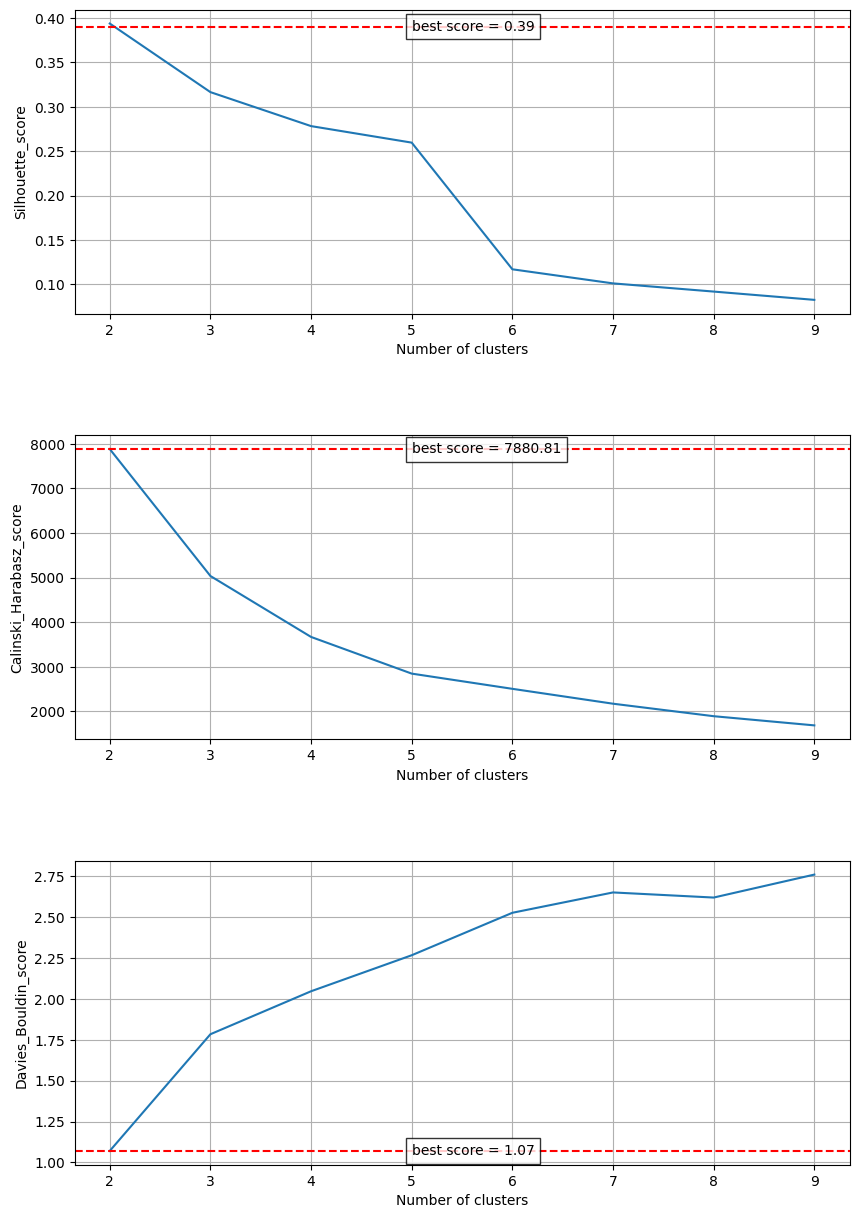

In [129]:
# Задание 4.4
# Пора переходить к кластеризации. Для начала определите оптимальное количество кластеров, используя внутренние меры кластеризации
# Используйте все известные вам коэффициенты, реализуемые в библиотеке sklearn: коэффициент силуэта, индекс Калински — Харабаса и индекс Дэвиса — Болдина
# В качестве алгоритма возьмите k-means++, в качестве значения параметра random_state — число 42
# Выведите оптимальное количество кластеров для каждой метрики, перебирая значения от 2 до 9 включительно
# Также введите значение каждой метрики, округлённое до двух знаков после точки-разделителя
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

Silhouette_score = []
Calinski_Harabasz_score = []
Davies_Bouldin_score = []

for n in range(2, 10):
    kmc = KMeans(n_clusters=n, random_state=42)
    kmc.fit(X)
    Silhouette_score.append(silhouette_score(X, kmc.labels_))
    Calinski_Harabasz_score.append(calinski_harabasz_score(X, kmc.labels_))
    Davies_Bouldin_score.append(davies_bouldin_score(X, kmc.labels_))

metrics = [Silhouette_score, Calinski_Harabasz_score, Davies_Bouldin_score]
metric_names = ['Silhouette_score', 'Calinski_Harabasz_score', 'Davies_Bouldin_score']
best_values = [round(max(Silhouette_score), 2),
               round(max(Calinski_Harabasz_score), 2),
               round(min(Davies_Bouldin_score), 2)]

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

for i, metric in enumerate(metrics):
    sns.lineplot(x=range(2, 10), y=metric, ax=ax[i])
    ax[i].set_xlabel('Number of clusters')
    ax[i].set_ylabel(metric_names[i])
    ax[i].axhline(y=best_values[i], linestyle='--', color='r', label=best_values[i])
    ax[i].text(x=5, y=best_values[i], s=f'best score = {best_values[i]}', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
    ax[i].grid()

plt.subplots_adjust(hspace=0.4)
plt.show()

In [130]:
# Задание 4.5
# Теперь давайте оценим качество кластеризации с точки зрения внешних мер. Реализуйте кластеризацию с помощью классической версии алгоритма k-means
# Пусть количество кластеров будет соответствовать количеству активностей. Задайте следующие значения параметров: random_state=42, init='random'
from sklearn.metrics import homogeneity_score, completeness_score, adjusted_rand_score

kmc = KMeans(n_clusters=6, init='random',random_state=42)
kmc.fit(X)

# В качестве ответов введите значения получившихся мер, предварительно округлив их до двух знаков после точки-разделителя
metrics = [homogeneity_score, completeness_score, adjusted_rand_score]
metric_names = ['homogeneity_score', 'completeness_score', 'adjusted_rand_score']
for i, metric in enumerate(metrics):
    print(f'{metric_names[i]} = {metric(y.values.flatten(), kmc.labels_):.2f}')

homogeneity_score = 0.54
completeness_score = 0.58
adjusted_rand_score = 0.42


In [131]:
# Задание 4.6
# Выясните, к каким кластерам были преимущественно отнесены различные активности (т. е. в какой кластер попало большинство наблюдений с этой активностью)
# Нумерацию кластеров начинайте с 1
# Заметьте, что кластеры могут повторяться
replacement_dict = {1: 'ходьба',
                    2: 'подъём',
                    3: 'спуск',
                    4: 'сидение',
                    5: 'стояние',
                    6: 'лежание'}

y_true = pd.Series(y.values.flatten(), name='y_true').map(replacement_dict)
y_pred = pd.Series(kmc.labels_ + 1, name='y_pred')
pd.crosstab(y_true, y_pred)

y_pred,1,2,3,4,5,6
y_true,,,,,,
лежание,0,5,329,1556,0,54
подъём,297,1236,2,0,9,0
сидение,0,1,447,91,0,1238
спуск,882,310,0,0,214,0
стояние,0,0,560,0,0,1346
ходьба,741,897,0,0,84,0


In [132]:
# Задание 4.7
# Теперь попробуйте реализовать алгоритм k-means для двух кластеров (для того числа активностей, которое является оптимальным с точки зрения внутренних мер) 
# и снова посмотреть, как алгоритм разобьёт активности по кластерам. Как и в предыдущем задании, нумерацию кластеров начинайте с 1
kmc_2 = KMeans(n_clusters=2, init='random',random_state=42)
kmc_2.fit(X)

y_true = pd.Series(y.values.flatten(), name='y_true').map(replacement_dict)
y_pred = pd.Series(kmc_2.labels_ + 1, name='y_pred')
pd.crosstab(y_true, y_pred)

y_pred,1,2
y_true,,
лежание,12,1932
подъём,1536,8
сидение,3,1774
спуск,1406,0
стояние,0,1906
ходьба,1722,0


In [133]:
# Задание 4.8
# Вычислите значение полноты для разбиения на два кластера алгоритмом k-means. Ответ округлите до двух знаков после точки-разделителя
print(f'completeness_score = {completeness_score(y.values.flatten(), kmc_2.labels_):.2f}')

completeness_score = 0.98


In [134]:
# Задание 4.10
# Давайте сравним полученный результат с агломеративной иерархической кластеризацией. Реализуйте её также для двух кластеров и вычислите значение полноты
from sklearn.cluster import AgglomerativeClustering

aggc = AgglomerativeClustering(n_clusters=2)
aggc.fit(X)
print(f'completeness_score = {completeness_score(y.values.flatten(), aggc.labels_):.2f}')

completeness_score = 1.00


---
### 5. PCA

АЛГОРИТМ РЕАЛИЗАЦИИ PCA

1. Стандартизировать данные.

2. Рассчитать ковариационную матрицу для объектов.

3. Рассчитать собственные значения и собственные векторы для ковариационной матрицы.

4. Отсортировать собственные значения и соответствующие им собственные векторы.

5. Выбрать  наибольших собственных значений и сформировать матрицу соответствующих собственных векторов.

6. Преобразовать исходные данные, умножив матрицу данных на матрицу отобранных собственных векторов.



Допустим, у нас есть набор данных, состоящий из четырёх признаков:

| $x_1$ | $x_2$ | $x_3$ | $x_4$ |
|----------|----------|----------|----------|
| 1  | 2  | 3  | 4  |
| 5  | 5  | 6  | 7  |
| 1  | 4  | 2  | 3  |
| 5  | 3  | 2  | 1  |
| 8  | 1  | 2  | 2  |

Мы хотим сократить количество измерений до двух.

На первом шаге необходимо стандартизировать данные. 

In [135]:
import numpy as np
import pandas as pd
A = np.matrix([[1,2,3,4],
               [5,5,6,7],
               [1,4,2,3],
               [5,3,2,1],
               [8,1,2,2]])

df = pd.DataFrame(A, columns  = ['x1','x2','x3','x4'])
df_std  = (df - df.mean()) / (df.std())
df_std

,x1,x2,x3,x4
0,-1.000000,-0.632456,0.000000,0.260623
1,0.333333,1.264911,1.732051,1.563740
2,-1.000000,0.632456,-0.577350,-0.173749
3,0.333333,0.000000,-0.577350,-1.042493
4,1.333333,-1.264911,-0.577350,-0.608121


Перейдём ко второму шагу. Теперь нам необходимо вычислить ковариационную матрицу для наших стандартизированных данных.

In [136]:
cov_mat = np.cov(df_std.T)
cov_mat

array([[ 1.        , -0.31622777,  0.04811252, -0.18098843],
       [-0.31622777,  1.        ,  0.63900965,  0.61812254],
       [ 0.04811252,  0.63900965,  1.        ,  0.94044349],
       [-0.18098843,  0.61812254,  0.94044349,  1.        ]])

Следующим шагом нам необходимо вычислить собственные значения и собственные векторы для матрицы.

In [137]:
eigen_val, eigen_vectors = np.linalg.eig(cov_mat)

print(eigen_val,'\n')
print(eigen_vectors)

[2.51579324 1.0652885  0.39388704 0.02503121] 

[[ 0.16195986 -0.91705888 -0.30707099  0.19616173]
 [-0.52404813  0.20692161 -0.81731886  0.12061043]
 [-0.58589647 -0.3205394   0.1882497  -0.72009851]
 [-0.59654663 -0.11593512  0.44973251  0.65454704]]


Теперь нам необходимо выбрать два собственных вектора, так как в итоге мы хотим получить две компоненты. Нужно взять векторы с наибольшими собственными значениями. При нахождении собственных векторов в Python они выводятся в соответствии с убыванием соответствующих собственных значений, поэтому берём первые два вектора:

In [138]:
eigen_vectors.T[:2]

array([[ 0.16195986, -0.52404813, -0.58589647, -0.59654663],
       [-0.91705888,  0.20692161, -0.3205394 , -0.11593512]])

Осталось только найти главные компоненты. Для этого перемножаем матрицу стандартизированных признаков на матрицу с собственными векторами и получаем матрицу главных компонент:

In [139]:
df_std @ eigen_vectors.T[:2].T

,0,1
0,0.014003,0.755975
1,-2.556534,-0.780432
2,-0.051480,1.253135
3,1.014150,0.000239
4,1.579861,-1.228917


Таким образом, мы получили две главных компоненты. Можно проверить, получили ли бы мы тот же результат, если бы воспользовались сразу готовым алгоритмом на *Python* — PCA.

В параметр `n_components` в качестве значения можно передать количество необходимых компонентов или минимально допустимую объяснённую дисперсию в виде десятичной дроби. Например, если нам нужно столько компонент, чтобы они объясняли не менее 90 % разброса данных, то мы запишем `n_components = 0.9`.

In [140]:
#импортируем нужный алгоритм

from sklearn.decomposition import PCA
#определяем метод главных компонент с двумя компонентами
pca = PCA(n_components=2)
#обучаем алгоритм на наших данных
principalComponents = pca.fit_transform(df_std)
principalComponents

array([[-1.40033078e-02, -7.55974765e-01],
       [ 2.55653399e+00,  7.80431775e-01],
       [ 5.14801919e-02, -1.25313470e+00],
       [-1.01415002e+00, -2.38808310e-04],
       [-1.57986086e+00,  1.22891650e+00]])

In [141]:
# Задание 5.1
# Найдите матрицу ковариаций для векторов (3, 4, 1) и (1, 6, 2)
# В качестве ответа укажите сумму всех значений матрицы, округлённую до двух знаков после точки-разделителя
a = np.array([3, 4, 1])
b = np.array([1, 6, 2])
round(np.cov(np.array([a, b])).sum(), 2)

14.33

In [142]:
# Задание 5.4
# Дана матрица признаков:
A = np.matrix([[8,7,2,9],
               [1,3,6,3],
               [7,2,0,3],
               [10,3,1,1],
               [8,1,3,4]])
# Какое минимальное количество главных компонент надо выделить, чтобы сохранить информацию о как минимум 90 % разброса данных?
A = pd.DataFrame(A)
A_std = (A - A.mean()) / A.std() # (A - np.mean(A, axis=0)) / np.std(A, axis=0, ddof=1) Если не переводить в DataFrame
pca = PCA(n_components=0.9)
pca.fit_transform(A_std).shape[1]

3

---
### 6. Снижение размерности: SVD и t-SNE

Суть сингулярного разложения заключается в следующей теореме ↓

Любую прямоугольную матрицу $A$ размера $(n,m)$ можно представить в виде произведения трёх матриц:

<div align="center">

$A_{n \times m} = U_{n \times n} \cdot D_{n \times m} \cdot V^T_{m \times m}$

</div>

В этой формуле:

 * $U$ — матрица размера $(n,n)$. Все её столбцы ортогональны друг другу и имеют единичную длину. Такие матрицы называются **ортогональными**. Эта матрица содержит нормированные собственные векторы матрицы $AA^T$.
 * $D$ — матрица размера $(n,m)$. На её главной диагонали стоят числа, называемые **сингулярными числами** (они являются корнями из собственных значений матриц $AA^T$ и $A^TA$), а вне главной диагонали стоят нули. Если мы решаем задачу снижения размерности, то элементы этой матрицы, если их возвести в квадрат, можно интерпретировать как дисперсию, которую объясняет каждая компонента.
 * $V$ — матрица размера $(m,m)$. Она тоже ортогональная и содержит нормированные собственные векторы матрицы $A^TA$.

Начнём с поиска матрицы $U$. Для этого нам необходимо сначала вычислить произведение матриц $A$ и $A^T$:

In [143]:
A = np.array([[-1, 1, 0],
             [-1, -1, 1]])
A

array([[-1,  1,  0],
       [-1, -1,  1]])

In [144]:
# Задание 6.1
# Вычислите получившееся произведение матриц A и A.T:
A @ A.T

array([[2, 0],
       [0, 3]])

In [145]:
eigen_val, eigen_vectors = np.linalg.eig(A @ A.T)

print(eigen_val,'\n')
print(eigen_vectors)

U = eigen_vectors / np.linalg.norm(eigen_vectors, axis=0)

[2. 3.] 

[[1. 0.]
 [0. 1.]]


Отлично, мы нашли векторы, чтобы составить матрицу $U$.

In [146]:
eigen_val, eigen_vectors = np.linalg.eig(A.T @ A)

print(eigen_val,'\n')
print(eigen_vectors)

V = eigen_vectors / np.linalg.norm(np.round(eigen_vectors), axis=0)

[-2.22044605e-16  2.00000000e+00  3.00000000e+00] 

[[ 4.08248290e-01 -7.07106781e-01  5.77350269e-01]
 [ 4.08248290e-01  7.07106781e-01  5.77350269e-01]
 [ 8.16496581e-01  5.52174535e-16 -5.77350269e-01]]


Теперь мы можем составить диагональную матрицу $D$:

In [147]:
# Создание диагональной матрицы D
D = np.zeros((U.shape[1], V.T.shape[0]))  # Создаем нулевую матрицу нужного размера
np.fill_diagonal(D, np.sqrt(eigen_val[::-1]))  # Заполняем диагональ сингулярными значениями
D

C:\Users\Blooodniy\AppData\Local\Temp\ipykernel_14000\3097838858.py:3: RuntimeWarning: invalid value encountered in sqrt
  np.fill_diagonal(D, np.sqrt(eigen_val[::-1]))  # Заполняем диагональ сингулярными значениями


array([[1.73205081, 0.        , 0.        ],
       [0.        , 1.41421356, 0.        ]])

Далее для нахождения матрицы $V$ нам необходимо вычислить произведение матрицы $A^T$ на матрицу $A$:

In [148]:
A.T @ A

array([[ 2,  0, -1],
       [ 0,  2, -1],
       [-1, -1,  1]])

In [149]:
eigen_val, eigen_vectors = np.linalg.eig(A.T @ A)

print(eigen_val,'\n')
print(eigen_vectors)

V = eigen_vectors / np.linalg.norm(np.round(eigen_vectors), axis=0)

[-2.22044605e-16  2.00000000e+00  3.00000000e+00] 

[[ 4.08248290e-01 -7.07106781e-01  5.77350269e-01]
 [ 4.08248290e-01  7.07106781e-01  5.77350269e-01]
 [ 8.16496581e-01  5.52174535e-16 -5.77350269e-01]]


# <span style="color:red">Нужно разобраться!</span>

In [150]:
np.round(U @ D @ V.T)

array([[ 1.,  1.,  1.],
       [-1.,  1.,  0.]])

```Python
# создаём объект класса TruncatedSVD
# n_components — размерность нового пространства, n_iter — количество итераций
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
# обучаем модель на данных X
svd.fit(X)
# применяем уменьшение размерности к матрице X
transformed = svd.transform(X)
```

##### t-SNE (стохастическое вложение соседей с t-распределением)

```Python
# импортируем класс TSNE из модуля manifold библиотеки sklearn
from sklearn.manifold import TSNE
# создаём объект класса TSNE
# n_components — размерность нового пространства
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
# обучаем модель на данных X и применяем к матрице X уменьшение размерности
tsne.fit_transform(X)
```

---
### 7. Снижение размерности. Практика

Данные содержат следующие признаки:

* `country` — название страны;
* `child_mort` — показатель смертности детей до 5 лет;
* `exports` — показатель экспорта на душу населения;
* `health` — показатель затрат на здравоохранение на душу населения;
* `imports` — показатель импорта на душу населения;
* `Income` — средний доход на душу населения;
* `Inflation` — годовой показатель инфляции;
* `life_expec` — средняя продолжительность жизни;
* `total_fer` — суммарный коэффициент рождаемости;
* `gdpp` — значение ВВП на душу населения.

In [151]:
# Задание 7.1
# Каково максимальное значение показателя средней продолжительности жизни среди представленных стран? Ответ округлите до одного знака после точки-разделителя
data = pd.read_csv('data\Country-data\Country-data.csv')
data['life_expec'].max()

82.8

In [152]:
# Задание 7.2
# Чтобы получить более качественные результаты, необходимо стандартизировать данные. Используйте для этого StandardScaler
# Примените его ко всем значениям признаков и впишите в качестве ответа значение первого признака для первого объекта 
# (таким образом можно будет проверить, что вы всё сделали корректно). Ответ округлите до двух знаков после точки-разделителя
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(data.select_dtypes(include='number'))
round(X[0, 0], 2)

1.29

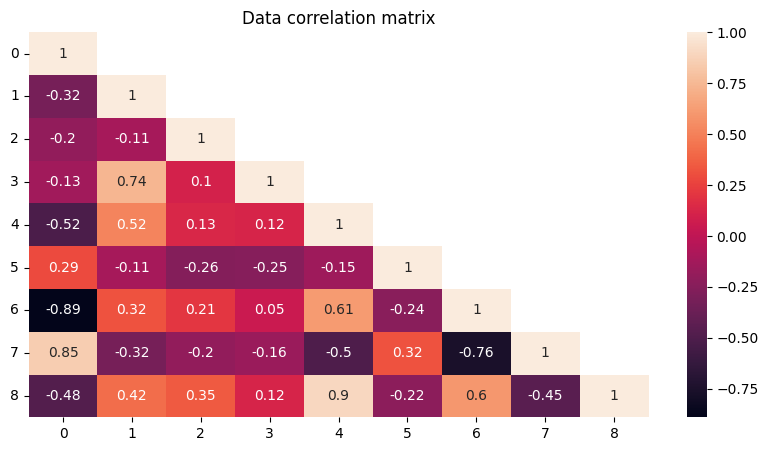

In [153]:
# Задание 7.3
# Как вы помните, нет смысла использовать сильно связанные друг с другом признаки, так как их можно преобразовать в один 
# и таким образом уменьшить общее количество признаков. Давайте выясним, есть ли в данных такие признаки
# Постройте матрицу корреляций для всех признаков. Найдите максимальный коэффициент корреляции
# Запишите его в качестве ответа, предварительно округлив до двух знаков после точки-разделителя
corr = np.round(np.corrcoef(X.T), 2)
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corr, mask=mask, annot=True)
ax.set_title('Data correlation matrix')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

In [154]:
# Задание 7.4
# Теперь понизим размерность данных — возьмём для этого метод главных компонент (PCA) как самый простой и популярный
# Найдите минимальное число компонент, которые суммарно могут объяснить как минимум 90 % разброса данных
pca = PCA(n_components=0.9)
pca.fit(X)
pca.components_.shape[1]

9

In [155]:
# Задание 7.5
# Используйте главные компоненты, выделенные в предыдущем задании
# Какую долю дисперсии объясняет первая главная компонента? Ответ округлите до двух знаков после точки-разделителя
round(pca.explained_variance_ratio_[0], 2)

0.46

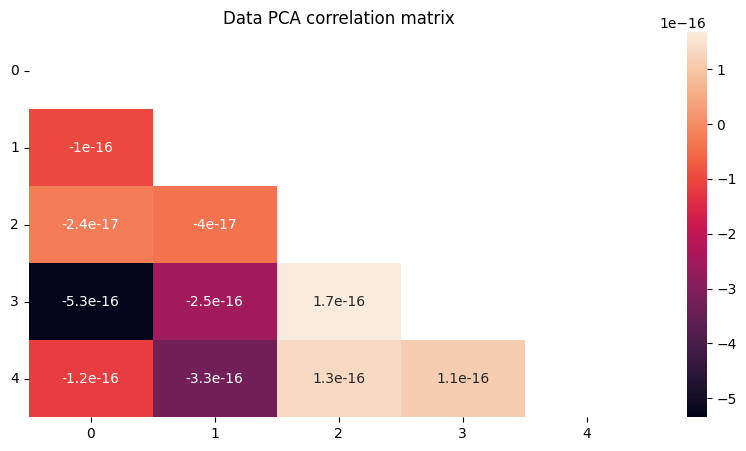

In [156]:
# Задание 7.6
# Как вы помните, при создании компонент с помощью PCA они должны получиться независимыми, то есть мы не должны теперь наблюдать высоких коэффициентов корреляции
# Постройте матрицу корреляций. Сколько значений в ней превышают 0.001, не считая единичных значений на главной диагонали?
X_pca = pca.transform(X)

corr = np.corrcoef(X_pca.T)
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corr, mask=mask, annot=True)
ax.set_title('Data PCA correlation matrix')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

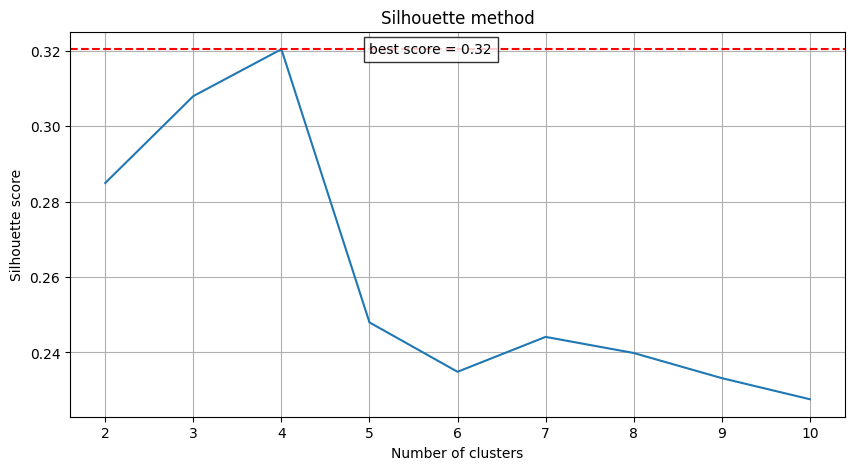

In [157]:
# Задание 7.7
# Теперь, когда мы уменьшили размерность данных, можно переходить к кластеризации
# Подберите оптимальное количество кластеров с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно
# Для кластеризации используйте алгоритм k-means++. В качестве значения параметра random_state возьмите число 1
# Судя по полученным результатам, сколько кластеров лучше всего взять?
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouettes = []

for n in range(2, 11):
    kmc = KMeans(n_clusters=n, random_state=1)
    kmc.fit(X_pca)
    silhouettes.append(silhouette_score(X_pca, kmc.labels_))

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=range(2, 11), y=silhouettes)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')
ax.axhline(y=max(silhouettes), linestyle='--', color='r', label=max(silhouettes))
ax.text(x=5, y=max(silhouettes), s=f'best score = {max(silhouettes):.2f}', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
ax.set_title('Silhouette method')
ax.grid()
plt.show()

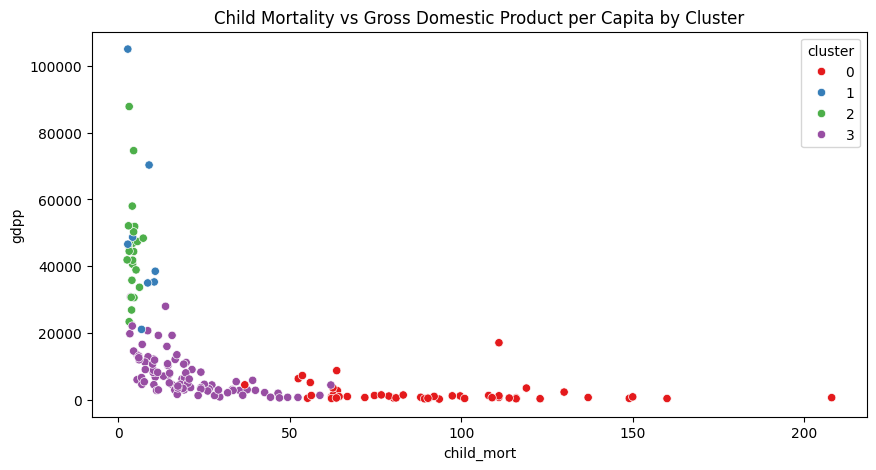

In [158]:
# Задание 7.8
# Теперь, когда оптимальное количество кластеров выбрано, реализуйте алгоритм k-means++ с этим параметром. В качестве значения random_state возьмите число 1
# В какой кластер попали страны, у которых самый высокий показатель детской смертности и самый низкий ВВП на душу населения?
kmc_opt = KMeans(n_clusters=4, random_state=1)
kmc_opt.fit(X_pca)
data['cluster'] = kmc_opt.labels_

fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=data, x='child_mort', y='gdpp', hue='cluster', palette='Set1')
ax.set_title('Child Mortality vs Gross Domestic Product per Capita by Cluster')
plt.show()

In [159]:
# Задание 7.9
# Итак, мы понимаем, что именно в выбранном нами кластере находятся страны, которые особенно остро нуждаются в финансовой помощи
# Однако на все страны у нас не хватит ресурсов, поэтому давайте выберем из выделенного кластера три страны, в которых самая маленькая продолжительность жизни
data[data['cluster']==0][['country', 'life_expec']].sort_values(by='life_expec').head(10)

,country,life_expec
66,Haiti,32.1
87,Lesotho,46.5
31,Central African Republic,47.5
166,Zambia,52.0
94,Malawi,53.1
137,South Africa,54.3
106,Mozambique,54.5
132,Sierra Leone,55.0
64,Guinea-Bissau,55.6
0,Afghanistan,56.2
